## **OCR MODEL**

# **About Dataset**

# Context
Consist 28x28 handwritten Alphabet images in pixel format

## Content
There are total 785 columns, each row consists an image of alphabets. The first column represents the alphabet numbering from 0-25 as A-Z.

## Import Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [ ]:
# Ignores warning messages 
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/handwritten_data_785.csv.zip

Archive:  gdrive/My Drive/handwritten_data_785.csv.zip
  inflating: handwritten_data_785.csv  


In [ ]:
dataset = pd.read_csv("handwritten_data_785.csv").astype('float32')

In [ ]:
dataset.rename(columns={'0':'label'}, inplace=True)

In [ ]:
# Splits the data into X - input data and y - output data
X = dataset.drop('label',axis = 1)
y = dataset['label']

In [ ]:
import string

In [ ]:
# Change label to alphabets
alphabets_map = dict(enumerate(string.ascii_uppercase, 0))
dataset['label'] = dataset['label'].map(alphabets_map)

## Data Exploration

In [ ]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372037 entries, 0 to 372036
Columns: 784 entries, 0.1 to 0.571
dtypes: float32(784)
memory usage: 1.1 GB
None


In [ ]:
X.head(5)

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.utils import shuffle
X_shuffled = shuffle(X)

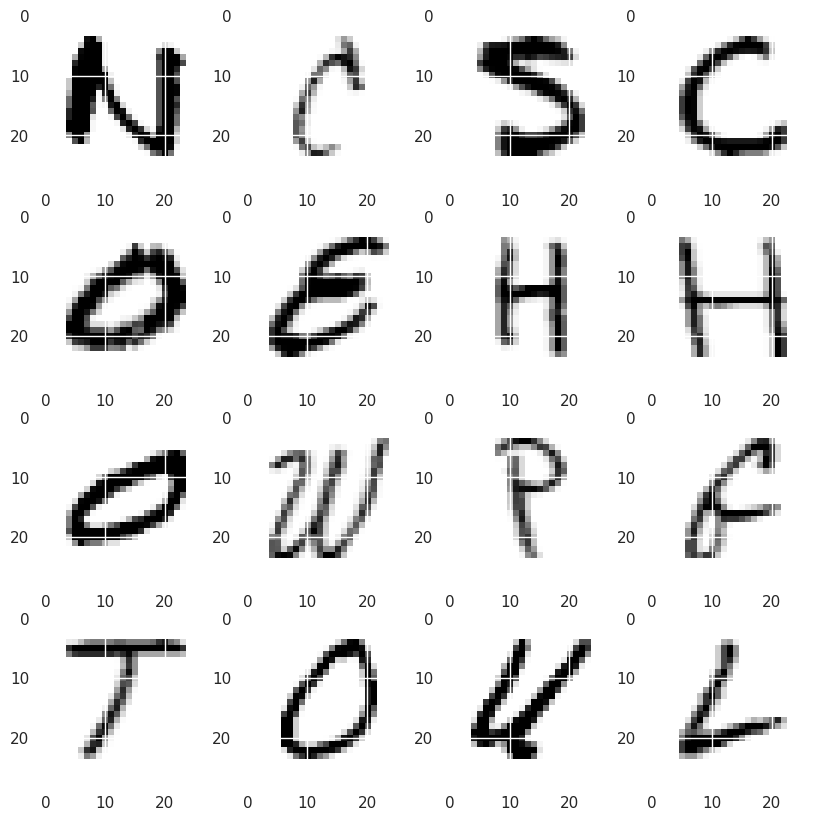

In [ ]:
plt.figure(figsize = (10,10))
row, columns = 4, 4
for i in range(16):  
    plt.subplot(columns, row, i+1)
    plt.imshow(X_shuffled.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

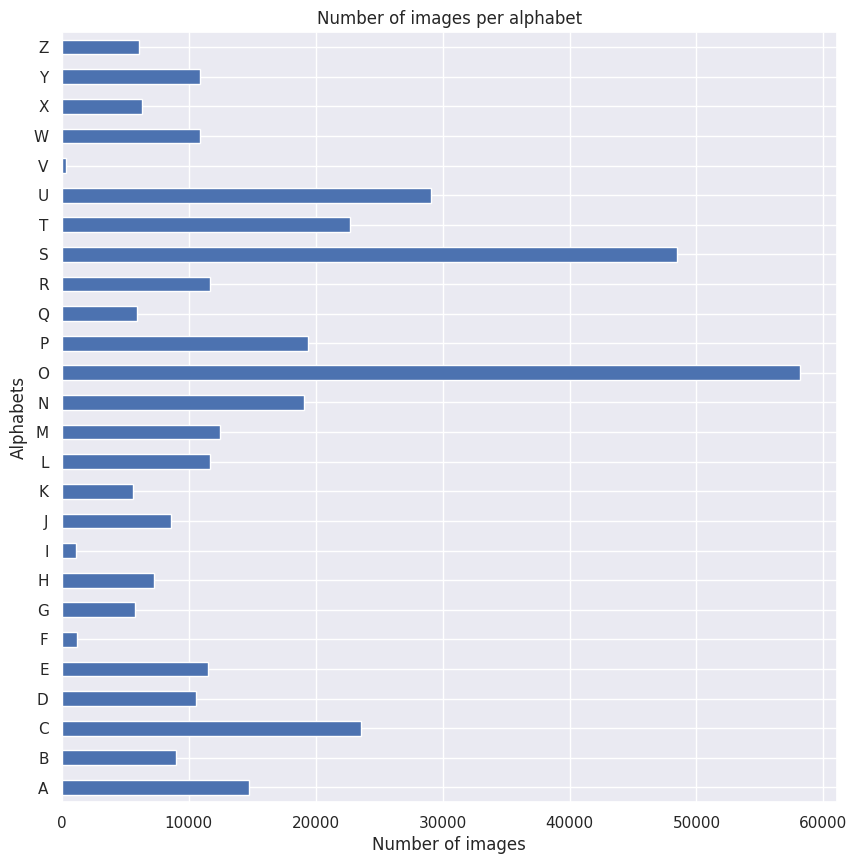

In [ ]:
# Bar chart to show number of images per alphabet in training dataset

label_size = dataset.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.xlabel("Number of images")
plt.ylabel("Alphabets")
plt.title("Number of images per alphabet")
plt.show()

In [ ]:
print("We have very less number of images for F, I and V ")
print("F count:", label_size['F'])
print("I count:", label_size['I'])
print("V count:", label_size['V'])

We have very less number of images for F, I and V 
F count: 1164
I count: 1118
V count: 340


## Data Preparation

In [ ]:
# Splits the data 

X_train, XX, y_train, yy = train_test_split(X, y, test_size=0.4)
X_valid, X_test, y_valid, y_test = train_test_split(XX, yy, test_size=0.6, shuffle=True)

In [ ]:
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_valid shape: {}'.format(X_valid.shape))
print('y_valid shape: {}'.format(y_valid.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (223222, 784)
y_train shape: (223222,)
X_valid shape: (59526, 784)
y_valid shape: (59526,)
X_test shape: (89289, 784)
y_test shape: (89289,)


In [ ]:
# Scales the data

standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_valid = standard_scaler.transform(X_valid)
X_test = standard_scaler.transform(X_test)

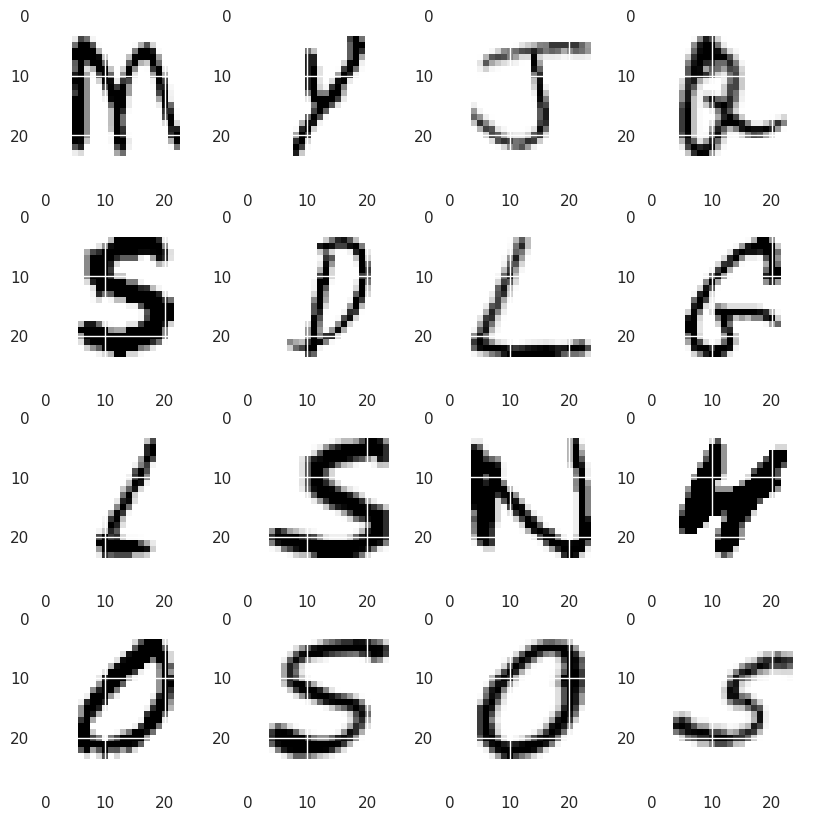

In [ ]:
# Data after scaling

X_shuffled = shuffle(X_train)

plt.figure(figsize = (10,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffled[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_valid = np_utils.to_categorical(y_valid)
y_test = np_utils.to_categorical(y_test)

## **Build the Model**

In [ ]:
model = Sequential([Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'),
                  MaxPooling2D(pool_size=(2, 2)),
                  Dropout(0.3),
                  Flatten(),
                  Dense(128, activation='relu'),
                  Dense(len(y.unique()), activation='softmax')])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
detail = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=4, batch_size=128, verbose=2)

Epoch 1/4
1744/1744 - 192s - loss: 0.2396 - accuracy: 0.9350 - val_loss: 0.1083 - val_accuracy: 0.9714 - 192s/epoch - 110ms/step
Epoch 2/4
1744/1744 - 152s - loss: 0.1053 - accuracy: 0.9715 - val_loss: 0.0840 - val_accuracy: 0.9770 - 152s/epoch - 87ms/step
Epoch 3/4
1744/1744 - 151s - loss: 0.0821 - accuracy: 0.9774 - val_loss: 0.0722 - val_accuracy: 0.9812 - 151s/epoch - 87ms/step
Epoch 4/4
1744/1744 - 151s - loss: 0.0681 - accuracy: 0.9812 - val_loss: 0.0684 - val_accuracy: 0.9822 - 151s/epoch - 86ms/step


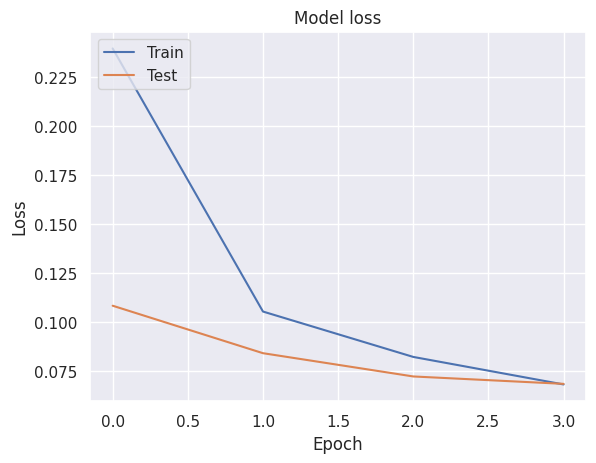

In [ ]:
plt.plot(detail.history['loss'])
plt.plot(detail.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])

CNN Score: 0.9816774725914001


In [ ]:
model.save('ocr_model.h5')

In [ ]:
!unzip gdrive/My\ Drive/Test.zip

Archive:  gdrive/My Drive/Test.zip
  inflating: english11/img011-00001.png  
 extracting: english11/img011-00002.png  
 extracting: english11/img012-00003.png  
 extracting: english11/img012-00004.png  
 extracting: english11/img013-00005.png  
 extracting: english11/img013-00006.png  
 extracting: english11/img014-00007.png  
 extracting: english11/img014-00008.png  
 extracting: english11/img015-00009.png  
 extracting: english11/img015-00010.png  
 extracting: english11/img016-00011.png  
 extracting: english11/img016-00012.png  
 extracting: english11/img017-00013.png  
 extracting: english11/img017-00014.png  
  inflating: english11/img018-00015.png  
  inflating: english11/img018-00016.png  


In [ ]:
from keras.models import load_model
from google.colab.patches import cv2_imshow
import cv2
import os

def load_ocr_model(model_path):
    # Loads the pre-trained OCR model
    model = load_model(model_path)
    return model

def preprocess_image(img):
    # Converts the image to grayscale, resize to 28x28, and invert colors
    array = cv2.bitwise_not(cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (28, 28), interpolation=cv2.INTER_AREA))

    # Normalizes pixel values
    array = array.reshape(1, 28, 28, 1).astype('float32') / 255

    return array

def predict_from_folder(model, folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Loads the image
            image_path = os.path.join(folder_path, filename)
            img = cv2.imread(image_path)

            array = preprocess_image(img)

            prediction = model.predict(array)

            print(filename, chr(prediction.argmax() + 65))
            cv2_imshow(img)

1/1 [==============================] - 0s 92ms/step
img014-00008.png D


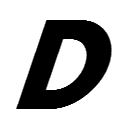

1/1 [==============================] - 0s 34ms/step
img013-00006.png C


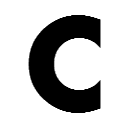

1/1 [==============================] - 0s 40ms/step
img012-00004.png B


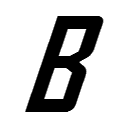

1/1 [==============================] - 0s 37ms/step
img016-00011.png F


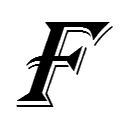

1/1 [==============================] - 0s 22ms/step
img017-00014.png G


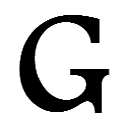

1/1 [==============================] - 0s 23ms/step
img012-00003.png B


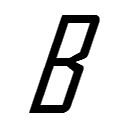

1/1 [==============================] - 0s 23ms/step
img018-00016.png H


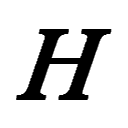

1/1 [==============================] - 0s 22ms/step
img016-00012.png P


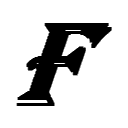

1/1 [==============================] - 0s 22ms/step
img017-00013.png G


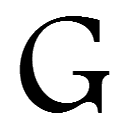

1/1 [==============================] - 0s 21ms/step
img011-00002.png A


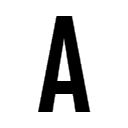

1/1 [==============================] - 0s 25ms/step
img018-00015.png H


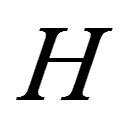

1/1 [==============================] - 0s 22ms/step
img011-00001.png A


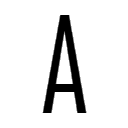

1/1 [==============================] - 0s 37ms/step
img015-00010.png E


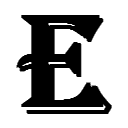

1/1 [==============================] - 0s 48ms/step
img015-00009.png E


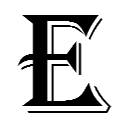

1/1 [==============================] - 0s 24ms/step
img014-00007.png D


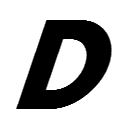

1/1 [==============================] - 0s 21ms/step
img013-00005.png C


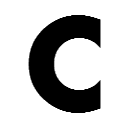

In [ ]:
model = load_ocr_model('ocr_model.h5')
folder_path = '/content/english11'
predict_from_folder(model, folder_path)